In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for plotting

## `Binary Logistic Regression` 

**` Logistic Regression `** is a popular classification algorithm that is used to model <br>
the relationship between a [dependent binary variable](https://www.scribbr.com/methodology/independent-and-dependent-variables/)
,<br> represented by the outcome variable Y, and one or more [independent variables](https://www.scribbr.com/methodology/independent-and-dependent-variables/),<br> represented by the predictor variables X. 

![dependent binary variable](https://www.voxco.com/wp-content/uploads/2021/08/Independent-Variables-and-Dependent-Variables.jpg)

## `Logistic Regression Formula` 

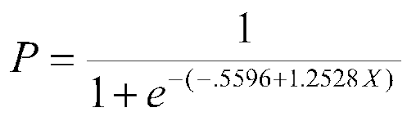

where:

- `p` is the probability of the dependent variable Y being equal to 1 given the predictor variables X.
- `z` is the linear combination of the predictor variables X and their respective coefficients β.
- `e` is the mathematical constant e, also known as Euler's number, approximately equal to 2.71828.

### `Logistic Regression Implementation` 

 - Intilaze Weidgts

In [2]:
def intialize_weights(n):
    """"
    arguments:
    n -- size of the w vector we want (or number of parameters in this case)
    returns:
    w -- initialized vector of shape (n,1) 
    """
    w = np.zeros((n+1,1)) # n+1 because of bias
    return w

 - Sigmoid Function

- ![Sigmoid Function](https://siebelm.github.io/GIF/logsigmoid.gif)

In [3]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

 - Cost  Function

In [4]:
# Cost Function
def cost_function(X, y, w):
    """"
    args:
        X: input features
        y: output
        w: weights
    return: cost
    cost = (-1/m) * (np.dot(y.T, np.log(y_pred)) + np.dot((1-y).T, np.log(1-y_pred)))
    
    """
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X,w))
    cost = (-1/m) * (np.dot(y.T, np.log(y_pred)) + np.dot((1-y).T, np.log(1-y_pred)))
    return cost

- Implementation

In [5]:
def simple_logistic_regression(X,y,w,num_iter, alpha):
    """"
    args:
        X: input features
        y: output
        w: weights
        num_iter: number of iterations
        alpha: learning rate
    return: weights, cost_list, y_pred
    """
    
    
    m = X.shape[0] # number of training examples
    cost_list = [] # to store the cost after each iteration
    X = np.hstack((np.ones((m,1)), X)) # adding bias
    
    for i in range(num_iter):
        z = np.dot(X,w) # linear combination
        h = sigmoid(z) # prediction
        J = cost_function(X,y,w) # cost
        cost_list.append(J)
        
        # gradient descent
        w = w - (alpha/m) * np.dot(X.T, (h-y))
        
        # get threshold
        
        
        if i != 0:
            if abs(cost_list[i] - cost_list[i-1]) < 0.0001:
                break

             
    
    return w, cost_list , h         
    
    

### `Logistic Regression Exaple` 

Text(0.5, 1.0, 'Logistic Regression Distribution')

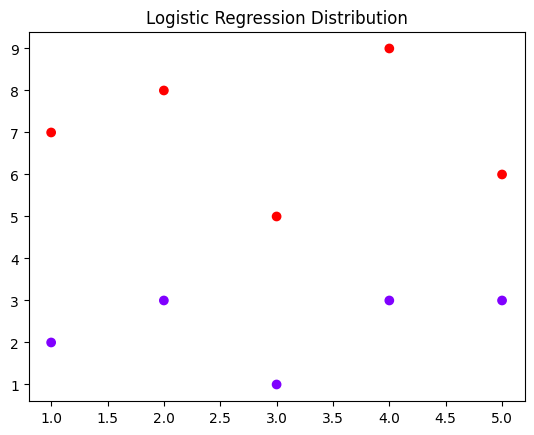

In [6]:
# Example of Logistic Regression
# suppose we have a dataset with 2 features and 1 output
# we want to predict if the output is 0 or 1
# X is the input features with 2 features and non linearly separable
X = np.array([[1,2],[2,3],[3,1],[4,3],[5,3],[1,7],[2,8],[3,5],[4,9],[5,6]])
y = np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]])

plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.title('Logistic Regression Distribution')


In [7]:
def experiment():
    w = intialize_weights(X.shape[1])
    w, cost_list, y_pred = simple_logistic_regression(X,y,w,1000,0.03)
    print("Weights: \n", w)
    print("*********************************")
    print("Cost: \n", cost_list[-1])
    print("*********************************")
    print("Predictions:  \n", y_pred)
    return w, cost_list, y_pred

    
w , cost_list, y_pred = experiment()


Weights: 
 [[-1.9531778 ]
 [-0.94817592]
 [ 1.24844102]]
*********************************
Cost: 
 [[0.195402]]
*********************************
Predictions:  
 [[0.40045134]
 [0.47409677]
 [0.02797901]
 [0.11920168]
 [0.04982332]
 [0.99708967]
 [0.99784209]
 [0.80910504]
 [0.99588167]
 [0.68910352]]


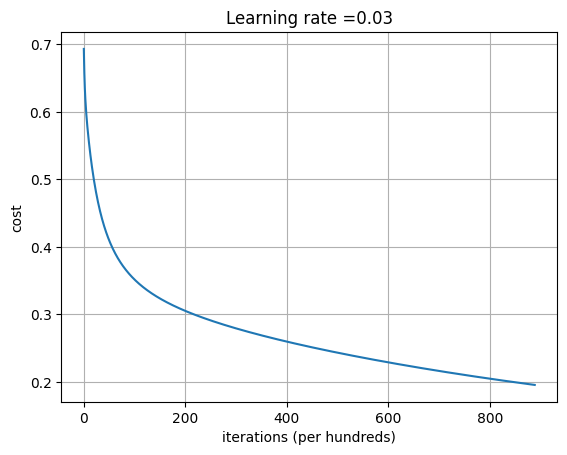

In [8]:
cost_list = np.squeeze(cost_list) # to remove extra dimensions
plt.plot(cost_list)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.03))
plt.grid()
plt.show()

In [16]:
np.where(y_pred > 0.1, 1, 0)

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [20]:
def get_best_threshold(y, y_out):
    """"
    define the best threshold for the model
    by calculating the accuracy for each threshold
    and return the best threshold
    
    args:

        y: output
        y_out: output from the model
    return: best threshold, best accuracy
    
    """
    best_threshold = 0
    best_accuracy = 0
    for threshold in np.arange(0,1,0.1):
        temp =  np.where(y_out > threshold, 1, 0)
        accuracy = np.sum(temp == y) / len(y)    
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
    return best_threshold ,best_accuracy

threshold = get_best_threshold(y, y_pred)
print("Best Threshold: ", threshold[0])
print("Best Accuracy: ", threshold[1])

Best Threshold:  0.5
Best Accuracy:  1.0


### `Refernces`

- [Logistic Regression: Calculating a Probability](https://towardsdatascience.com/logistic-regression-explained-from-scratch-visually-mathematically-and-programmatically-eb83520fdf9a)

- [Logistic Regression Explained from Scratch ](https://towardsdatascience.com/logistic-regression-explained-from-scratch-visually-mathematically-and-programmatically-eb83520fdf9a)